In [1]:
# Importing necessary libaries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

In [7]:
import h3
from shapely.geometry import Polygon, Point
import shapely.wkt
import math
import folium
import webbrowser #part of python standard libary
import os
from folium import Map

In [29]:
database=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/UC_database.csv")
database.drop(["Unnamed: 0"],axis=1, inplace=True)

In [32]:
def hex_3_point(lat, long, resolution = 9):
    """FUNCTION: Get H3 index, resolution goes from 1-16 (1 is the whole world)"""
    index = h3.geo_to_h3(lat=lat, lng = long, resolution = resolution)
    return index

SA=hex_3_point( 37.7749300, -122.4194200,resolution=4)
SA

'8428309ffffffff'

In [85]:
SA_list=list(h3.k_ring(SA,2))
len(SA_list)

19

In [39]:
index_list=[]

for index, row in database.iterrows():
    if database["h3_level_4"][index] in SA_list:
        index_list.append(index)
    else:
        continue

In [41]:
len(index_list)

7213

In [61]:
SA_database=database[database.index.isin(index_list)]
SA_database.shape

(7213, 11)

In [62]:
import datetime
SA_database['date'] = pd.to_datetime(SA_database['date'])
SA_database['month'] = SA_database['date'].apply(lambda x: x.strftime("%m"))

In [51]:
#SA_database.drop(["h3_level_4","date"],axis=1, inplace=True)

In [52]:
SA_database

,avgTemp,avgPerc,avgWind,q_avg_temp,y_avg_temp,q_sum_perc,y_sum_perc,lat,lng,month
6627,33.267800,52.033333,2.300000,33.970400,34.901600,323.633333,623.500000,38.193209,-122.196197,01
6628,34.218800,176.333333,2.300000,33.970400,34.901600,323.633333,623.500000,38.193209,-122.196197,02
6629,34.424600,95.266667,2.800000,33.970400,34.901600,323.633333,623.500000,38.193209,-122.196197,03
6630,35.009000,12.166667,3.400000,35.368400,34.901600,27.400000,623.500000,38.193209,-122.196197,04
6631,35.552600,0.000000,4.000000,35.368400,34.901600,27.400000,623.500000,38.193209,-122.196197,05
...,...,...,...,...,...,...,...,...,...,...
58361,33.723842,105.099987,2.936151,33.858171,35.077231,1111.066852,2620.890879,38.309001,-121.682402,11
58362,33.720735,110.037573,2.951191,33.858171,35.077231,1111.066852,2620.890879,38.309001,-121.682402,12
58363,33.720735,110.037573,2.133020,33.858171,35.077231,1111.066852,2620.890879,38.309001,-121.682402,12
58364,33.720735,110.037573,1.609570,33.858171,35.077231,1111.066852,2620.890879,38.309001,-121.682402,12


In [53]:
import joblib

model =  joblib.load("model_Ada_0.89.pkl")

In [63]:
X=SA_database.drop(["date","h3_level_4"],axis=1)

In [64]:
y_train_pred = model.predict(X)
y_train_pred_df = pd.DataFrame(y_train_pred,index=X.index,columns=["fire"])
probability = model.predict_proba(X)

In [65]:
y_train_pred_df["fire"].value_counts()

0    4266
1    2947
Name: fire, dtype: int64

In [66]:
probability_df=pd.DataFrame(probability,index=X.index,columns=["no","yes"])
probability_df

,no,yes
6627,0.477689,0.522311
6628,0.503049,0.496951
6629,0.503049,0.496951
6630,0.503049,0.496951
6631,0.480385,0.519615
...,...,...
58361,0.503049,0.496951
58362,0.503049,0.496951
58363,0.503049,0.496951
58364,0.503049,0.496951


In [67]:
SA_fire=pd.concat([SA_database,y_train_pred_df,probability_df],axis=1)

In [241]:
SA_fire

,h3_level_4,date,avgTemp,avgPerc,avgWind,q_avg_temp,y_avg_temp,q_sum_perc,y_sum_perc,lat,lng,month,fire,no,yes
6627,8428301ffffffff,1992-01-01,33.267800,52.033333,2.300000,33.970400,34.901600,323.633333,623.500000,38.193209,-122.196197,01,1,0.477689,0.522311
6628,8428301ffffffff,1992-02-01,34.218800,176.333333,2.300000,33.970400,34.901600,323.633333,623.500000,38.193209,-122.196197,02,0,0.503049,0.496951
6629,8428301ffffffff,1992-03-01,34.424600,95.266667,2.800000,33.970400,34.901600,323.633333,623.500000,38.193209,-122.196197,03,0,0.503049,0.496951
6630,8428301ffffffff,1992-04-01,35.009000,12.166667,3.400000,35.368400,34.901600,27.400000,623.500000,38.193209,-122.196197,04,0,0.503049,0.496951
6631,8428301ffffffff,1992-05-01,35.552600,0.000000,4.000000,35.368400,34.901600,27.400000,623.500000,38.193209,-122.196197,05,1,0.480385,0.519615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58361,8428305ffffffff,2025-11-30,33.723842,105.099987,2.936151,33.858171,35.077231,1111.066852,2620.890879,38.309001,-121.682402,11,0,0.503049,0.496951
58362,8428305ffffffff,2025-12-31,33.720735,110.037573,2.951191,33.858171,35.077231,1111.066852,2620.890879,38.309001,-121.682402,12,0,0.503049,0.496951
58363,8428305ffffffff,2025-12-31,33.720735,110.037573,2.133020,33.858171,35.077231,1111.066852,2620.890879,38.309001,-121.682402,12,0,0.503049,0.496951
58364,8428305ffffffff,2025-12-31,33.720735,110.037573,1.609570,33.858171,35.077231,1111.066852,2620.890879,38.309001,-121.682402,12,0,0.503049,0.496951


In [183]:
SA_fire_f=SA_fire[SA_fire["date"]>"2020-12-01"]
SA_fire_f=SA_fire_f[SA_fire_f["date"]<"2022-01-01"]
SA_fire_f=SA_fire_f[SA_fire_f["h3_level_4"]!="8428309ffffffff"]
SA_fire_f

,h3_level_4,date,avgTemp,avgPerc,avgWind,q_avg_temp,y_avg_temp,q_sum_perc,y_sum_perc,lat,lng,month,fire,no,yes
6959,8428301ffffffff,2021-01-01,33.927800,74.883333,2.466667,34.375538,34.920852,1047.747587,2222.884943,38.193209,-122.196197,01,1,0.477689,0.522311
7230,8428303ffffffff,2021-01-01,33.818600,100.890000,1.600000,34.193061,34.770726,749.216507,1562.979907,38.477607,-122.559237,01,1,0.477689,0.522311
7498,8428305ffffffff,2021-01-01,33.764000,71.900000,2.466667,34.362033,35.069430,1088.555931,2598.610379,38.309001,-121.682402,01,1,0.477689,0.522311
7831,8428307ffffffff,2021-01-01,33.789560,87.542857,2.466667,34.446377,35.189707,1106.901319,2166.171149,38.595039,-122.045604,01,1,0.477689,0.522311
8497,842830bffffffff,2021-01-01,33.927080,104.544444,2.466667,34.240267,34.708578,1447.852379,3611.011446,38.075459,-122.707168,01,1,0.477689,0.522311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58169,8428305ffffffff,2021-11-30,33.743238,103.137893,2.936151,33.877567,35.069430,1087.521727,2598.610379,38.309001,-121.682402,11,0,0.503049,0.496951
58170,8428305ffffffff,2021-12-31,33.740131,108.075479,2.951191,33.877567,35.069430,1087.521727,2598.610379,38.309001,-121.682402,12,0,0.503049,0.496951
58171,8428305ffffffff,2021-12-31,33.740131,108.075479,2.133020,33.877567,35.069430,1087.521727,2598.610379,38.309001,-121.682402,12,0,0.503049,0.496951
58172,8428305ffffffff,2021-12-31,33.740131,108.075479,1.609570,33.877567,35.069430,1087.521727,2598.610379,38.309001,-121.682402,12,0,0.503049,0.496951


In [232]:
SA_fire_f["fire_forcast"]=SA_fire_f["yes"].apply(lambda x: 1 if x>0.518 else 0)

In [233]:
SA_fire_f["fire_forcast"].value_counts()

0    364
1    153
Name: fire_forcast, dtype: int64

In [175]:
def create_map(clusters,df):
    # Create the map object
    map = Map(tiles="cartodbpositron", 
          attr= '© <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors © <a href="http://cartodb.com/attributions#basemaps">CartoDB</a>')

    # Convert the clusters dictionary items to polygons and add them to the map
    for cluster in clusters.values():
        points = cluster['geom']
        # points = [p[::-1] for p in points]
        tooltip = "{0} fire".format(cluster['fires'])
        polygon = folium.vector_layers.Polygon(locations=points, tooltip=tooltip,
                                               fill=True, 
                                               color='#ff0000', 
                                               fill_color='#ff0000',
                                               fill_opacity=0.4, weight=3, opacity=0.4)
        polygon.add_to(map)

    # Determine the map bounding box
    max_lat = df.lat.max()
    min_lat = df.lat.min()
    max_lon = df.lng.max()
    min_lon = df.lng.min()
    
    # Fit the map to the bounds
    map.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])
    
    return map


In [176]:
def show_map(map, file_name):
    """The show_map function saves the HTML generated by the map into a file and then opens a new browser tab with its contents."""
    map.save(file_name)
    wb = webbrowser.open('file://' + os.path.realpath(file_name), new=2)

In [177]:
clusters_fire = dict()

for index, row in SA_fire_f.iterrows():
    key = row['h3_level_4']
    #print(key)
    if SA_fire_f["fire"][index]==1:
        if key in clusters_fire:
            clusters_fire[key]['fires'] += 1
        else:
            clusters_fire[key] = {"fires": 1,
                         "geom": h3.h3_to_geo_boundary(key)}
    else:
        continue

In [178]:
h3_level=4
map = create_map(clusters_fire,SA_fire_f)
show_map(map, "map_{0}.html".format(h3_level))

In [245]:
SA_fires_plot=SA_fire[SA_fire["fire"]==1]
SA_fires_plot=SA_fires_plot[SA_fires_plot["date"]<"2020-12-01"]
#SA_fires_plot=SA_fire[SA_fire["date"]>"2020-12-01"]
#SA_fires_plot=SA_fires_plot[]
SA_fires_plot["year"]=SA_fires_plot["date"].apply(lambda x: x.year)
#SA_fires_plot=SA_fires_plot[["year","fires"]]
#SA_fires_plot=SA_fires_plot.groupby(["year"]).sum()


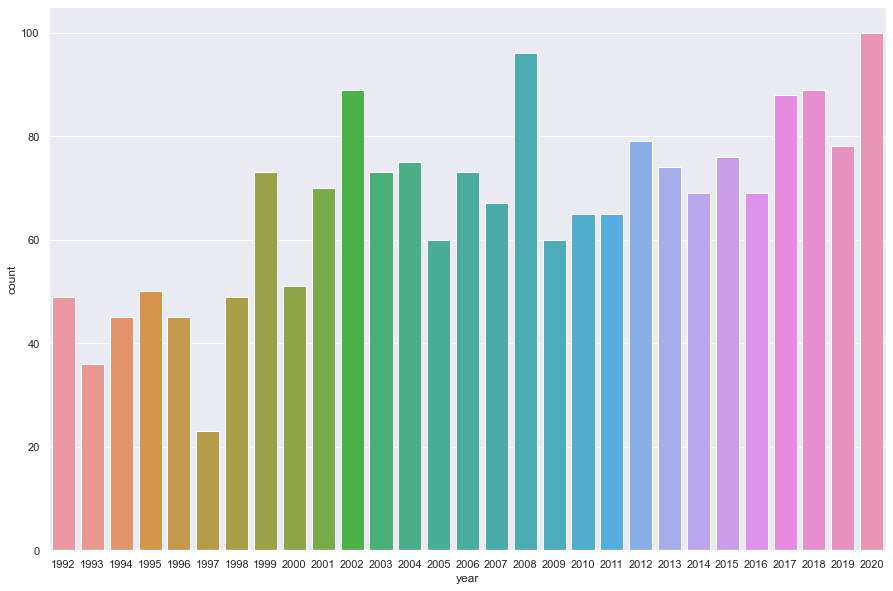

In [246]:
sns.set()
plt.figure(figsize=(15,10))
ax=sns.countplot(x=SA_fires_plot["year"], data=SA_fires_plot)
plt.show()